In [1]:
# Importamos librerias que vamos a utilizar
import matplotlib.pyplot as plt
import numpy as np
from  scipy.optimize import curve_fit
import sympy as sym
from sympy import init_printing

# Colocamos los dato originales:

Modos = [1,2,3,4,5,6,7,8,9]
Fuerza = [4.3, 1.5, 0.85, 0.5, 0.4, 0.3, 0.25, 0.2, 0.15]
Incerteza = [0.1, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

In [2]:
# Modificamos los datos que sean necesarios
Modos_1 = []
for Modo in Modos:
    Modos_1.append(1/(Modo**2))

# Podemos verificar como quedan los datos:
print(Modos_1)

[1.0, 0.25, 0.1111111111111111, 0.0625, 0.04, 0.027777777777777776, 0.02040816326530612, 0.015625, 0.012345679012345678]


In [3]:
# tenemos que definir algunas constantes
L = 1.75 #Longitud de vibración [m]
dL = 0.01 #Error de la longitud de vibración

Lt = 2.97 #Longitud total de la cuerda [m]
dLt = 0.01 #Error de la longitud total de la cuerda

Masa = 0.0037 #Masa de la cuerda
dMasa = 0.0001 #Error de la masa

Mu = Masa/Lt #densidad lineal de la cuerda

DERIVADA para calcular error lo más optimo es utilizar la formula, sea $f(a,b,c)$ definimos la incerteza como:

$$\Delta f(a,b,c) = \Delta a | \frac{\partial f}{\partial a} | + \Delta b | \frac{\partial f}{\partial b} | + \Delta c | \frac{\partial f}{\partial c} | $$

In [4]:
#Para calcular la incerteza de la densidad lineal:
a,b = sym.symbols('a b')
abs(sym.diff(a/b,a)) + abs(sym.diff(a/b,b))

Abs(a/b**2) + 1/Abs(b)

In [5]:
dMu = dMasa*(Masa/(Lt**2)) + dLt*(1/Lt)
print(Mu,'+/-',dMu)

0.0012457912457912459 +/- 0.0033670453128365587


Modelo inicial

$$ F = 4 \mu L_v^2 f^2 \frac{1}{n^2} $$

In [6]:
# Definimos una función para hacer el modelo sencillo
def funcion (x,f):
    F = 4*Mu*x*(np.power((L*f),2))
    return F

In [7]:
fit, cov = curve_fit(funcion,Modos_1,Fuerza )
fit #frecuencia array

array([17.11242057])

In [8]:
cov #error de frecuencia

array([[0.20316096]])

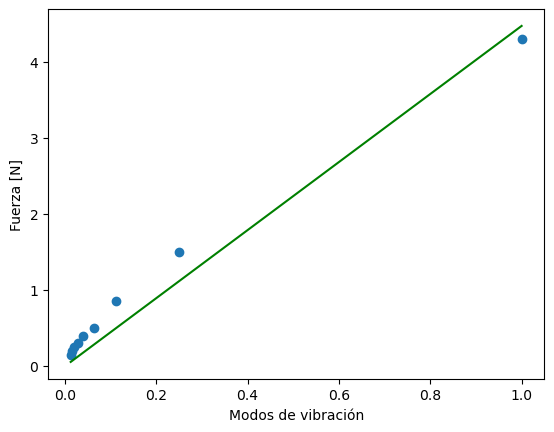

In [9]:
# Hacemos fit para el parametro f
fig, ax = plt.subplots()
ax.plot(np.array(Modos_1), funcion(np.array(Modos_1), *fit),'g-')
ax.scatter(Modos_1,Fuerza)
ax.set(xlabel = 'Modos de vibración', ylabel = 'Fuerza [N]')
plt.show()